# INSURANCE CLAIM FRAUD DETECTION PROJECT

### Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Insurance_Claim.csv')

First 5 entries

In [3]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns

Datatype of the features

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Column Names

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Missing Values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

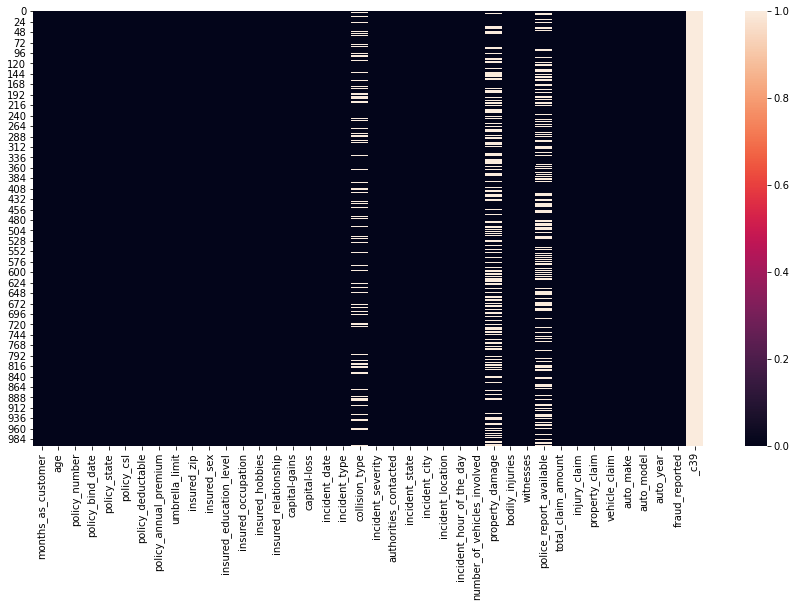

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [12]:
df.drop(['_c39'],axis=1,inplace=True)

In [13]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Year']=df['policy_bind_date'].dt.year
df['Month']=df['policy_bind_date'].dt.month
df['Day']=df['policy_bind_date'].dt.day

In [16]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [17]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [18]:
#Dropping of unimportant columns
df.drop(columns=['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

# Statistical Calculation

In [19]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Year,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,2001.604000,6.559000,15.448000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,7.360391,3.391758,8.850176
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1990.000000,1.000000,1.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1995.000000,4.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,2002.000000,7.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,2008.000000,9.000000,23.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,12.000000,31.000000


In [20]:
df.describe(include="O")

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,60,4,3,4,5,7,7,2,2,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,NO,NO,Suburu,RAM,N
freq,352,351,537,161,93,64,183,28,419,470,354,292,262,157,698,686,80,43,753


<AxesSubplot:>

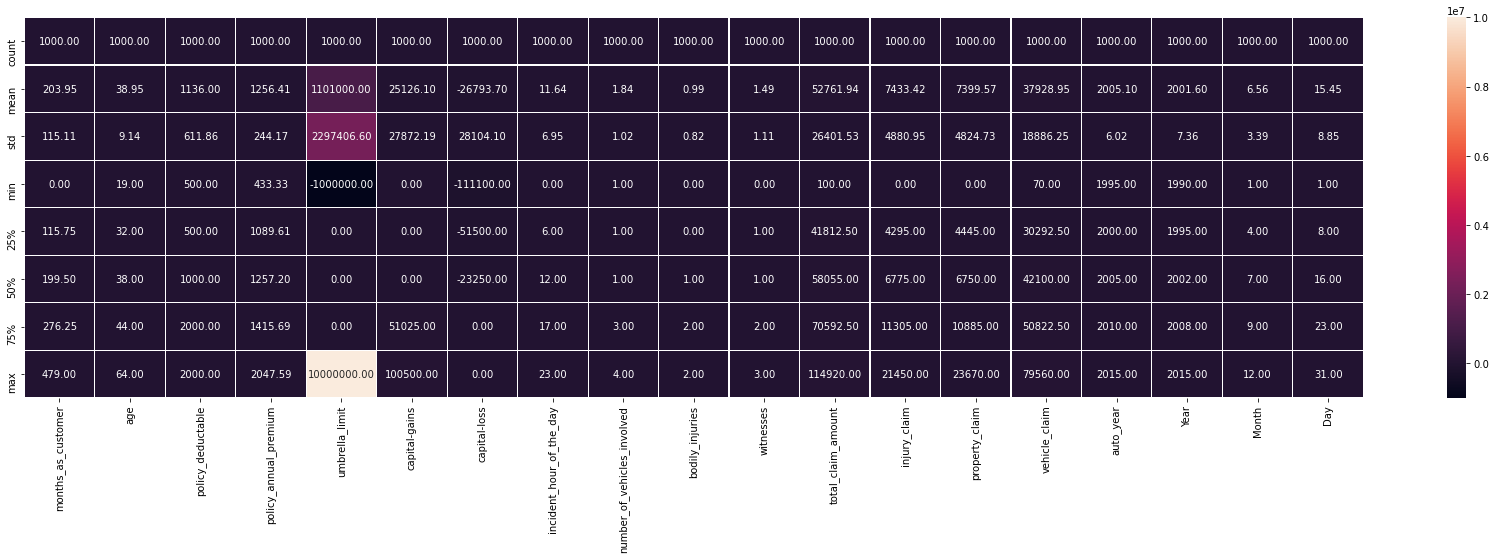

In [21]:
plt.figure(figsize=(30,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

# Class Imbalance

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

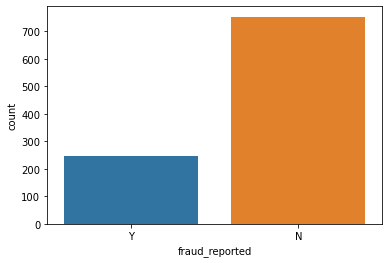

In [22]:
sns.countplot(x='fraud_reported',data=df)

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])

# Checking Correlation

In [24]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Year,Month,Day
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,-0.048276,0.005750,0.051728
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,-0.037444,0.015501,0.053869
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.049598,-0.050416,0.009164
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,0.001249,-0.035355,-0.025183
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622,0.048008,0.009961,-0.045207
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,0.041249,-0.011102,0.007994
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.026420,0.003436,-0.038297
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,0.035412,-0.000934,-0.009511
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.051839,0.026595,-0.044608,0.005787
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527,0.033877,0.029987,-0.031138,-0.043500


<AxesSubplot:>

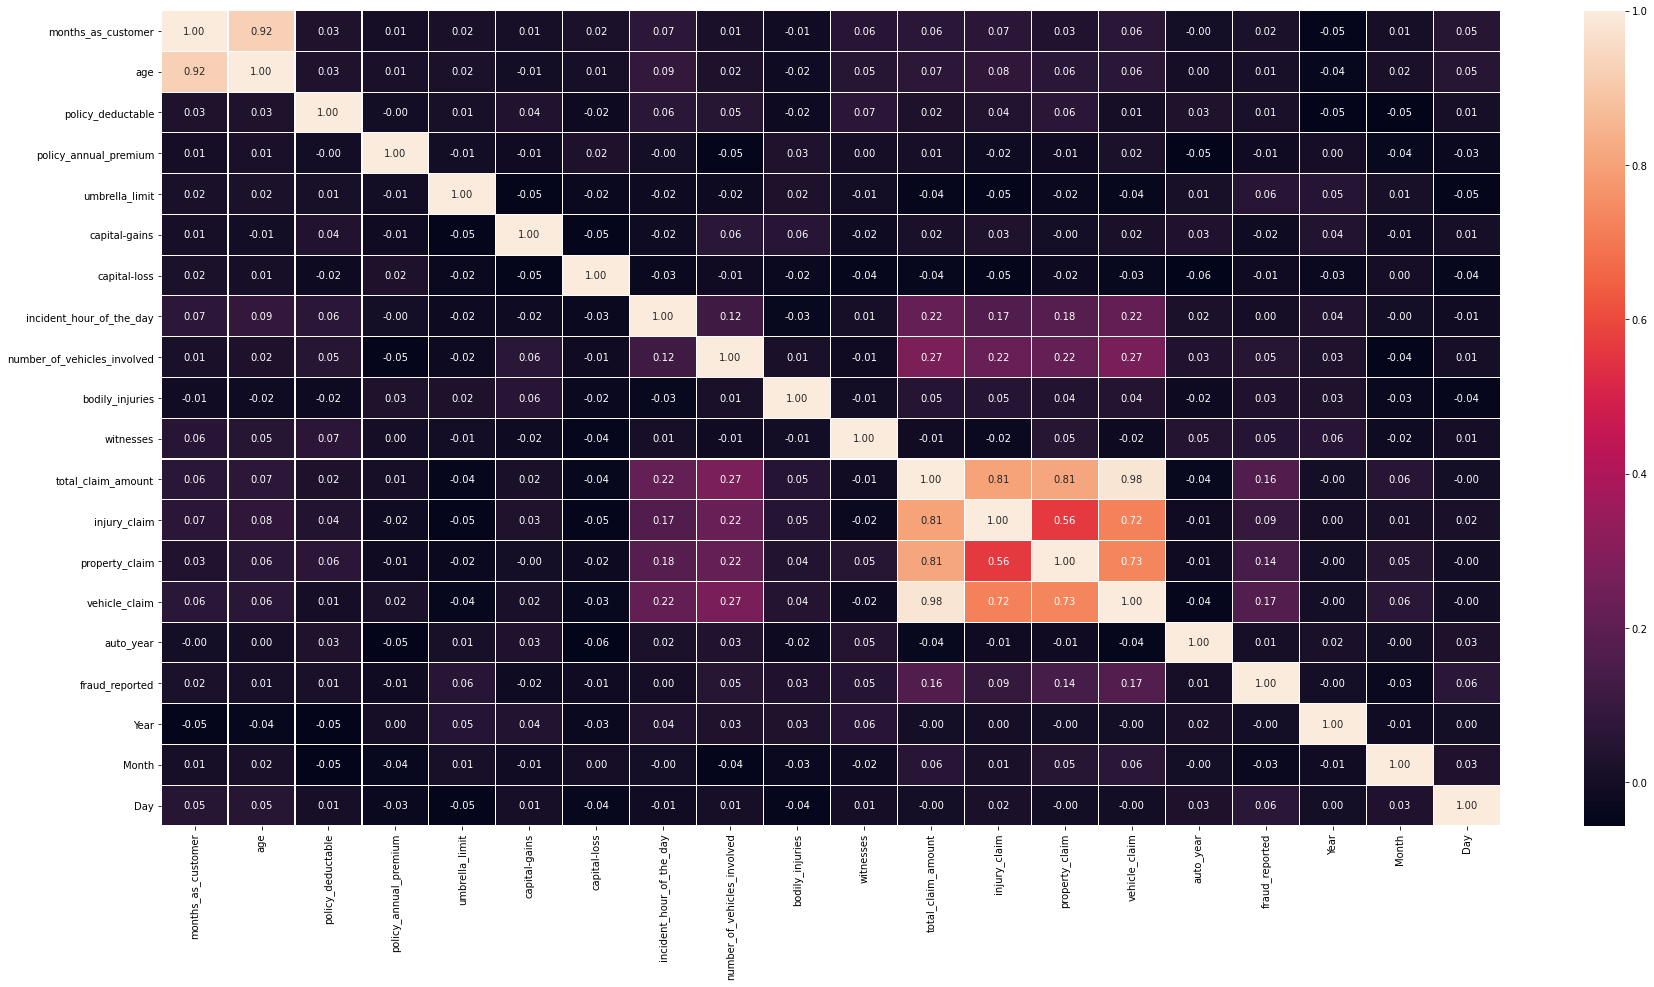

In [25]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

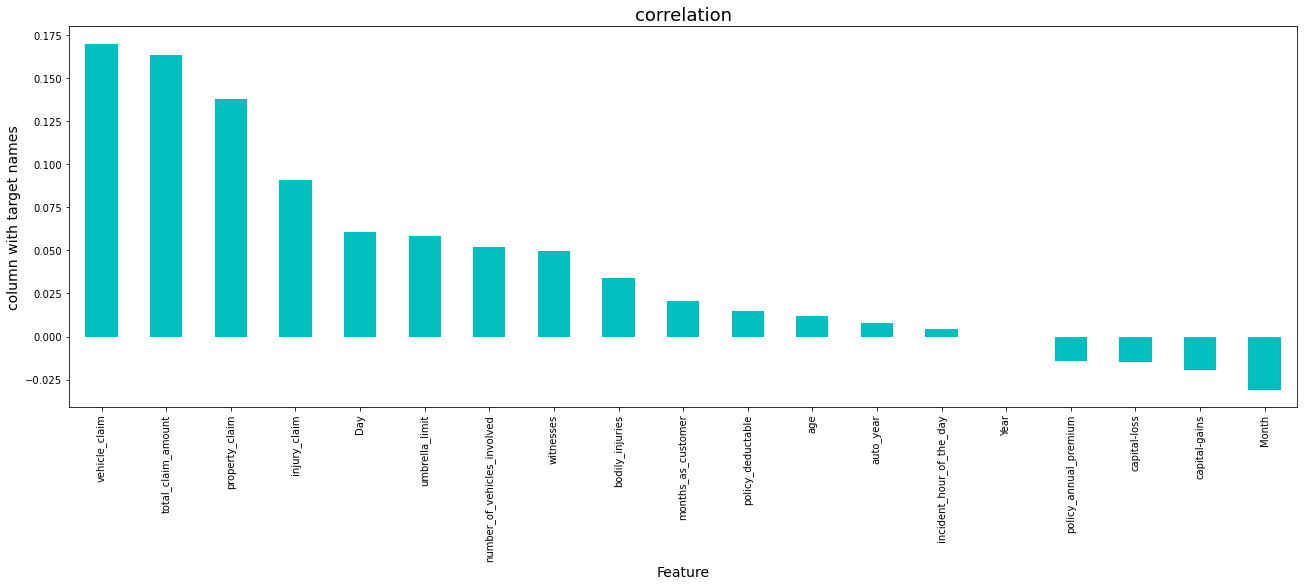

In [26]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [27]:
#total_claim_amount and vehicle_claim are highly correlated. Therefore dropping total_claim_amount.
df.drop(['total_claim_amount'],axis=1,inplace=True)

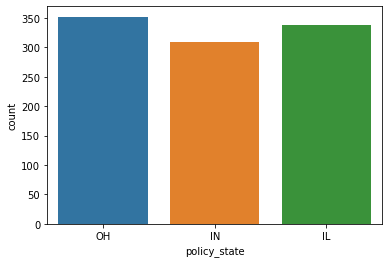

In [28]:
sns.countplot(x='policy_state',data=df);

The count for OH policy_state is quite more.

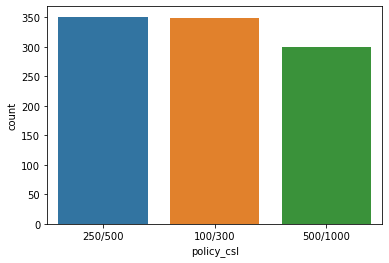

In [29]:
sns.countplot(x='policy_csl',data=df);

The 500/1000 policy_csl has less count as compared to the 250/500 and 100/300 policy_csl.

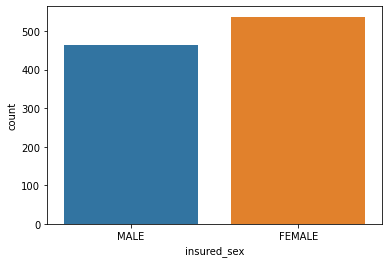

In [30]:
sns.countplot(x='insured_sex',data=df);

The count for insured female is more than the male.

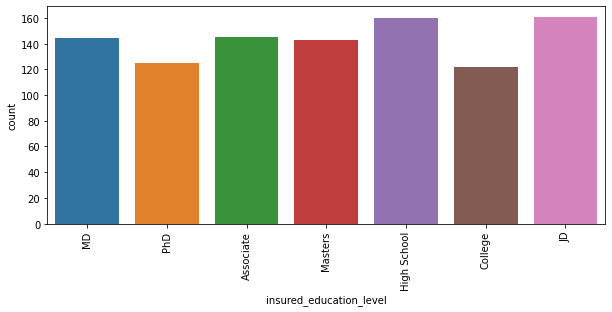

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_education_level',data=df);
plt.xticks(rotation=90);

The Phd holders and College students have less count in insured_education_level.

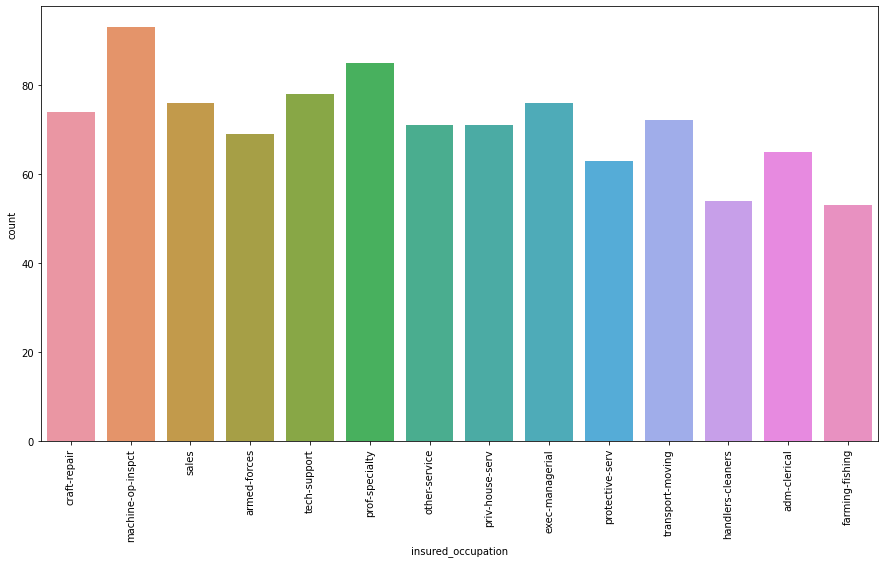

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='insured_occupation',data=df);
plt.xticks(rotation=90);

Machine-op-inspct is the highest insured_occupation while the handlers-cleaners is the least insured_occupation.

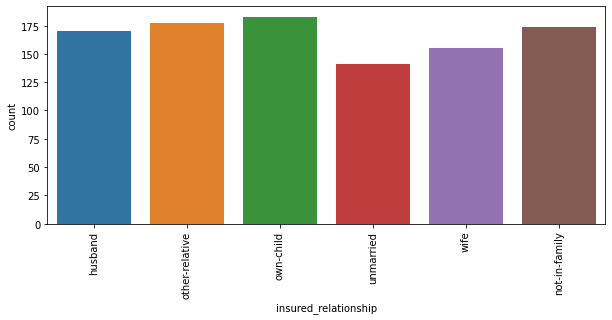

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_relationship',data=df);
plt.xticks(rotation=90);

The count for unmarried is less in insured_relationship.

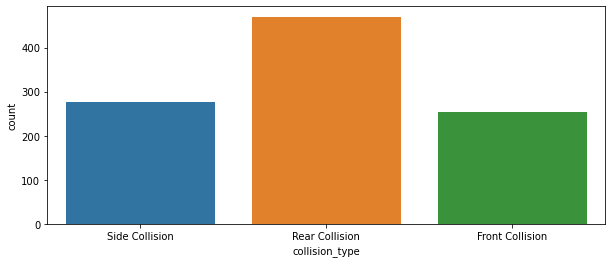

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='collision_type',data=df);

The count for Rear Collision is the highest for different collision_type.

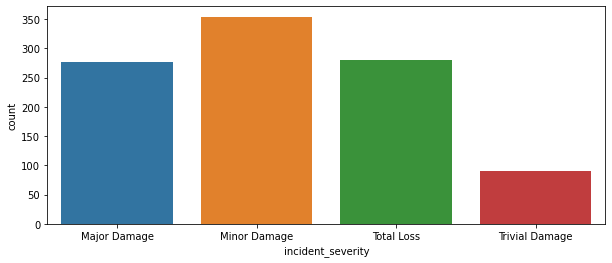

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_severity',data=df);

    For Trivial Damage the count is much less than the rest.

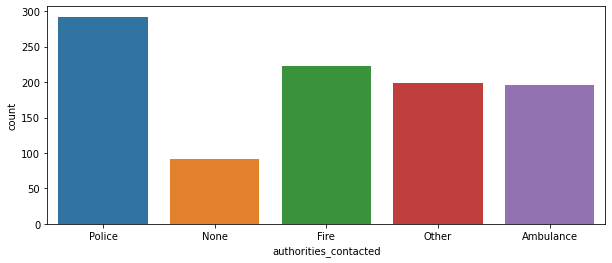

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x='authorities_contacted',data=df);

Police are the most contacted authorities .

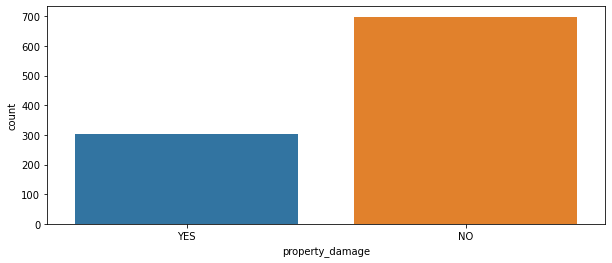

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x='property_damage',data=df);

It is seen that count is much more for No property_damage .

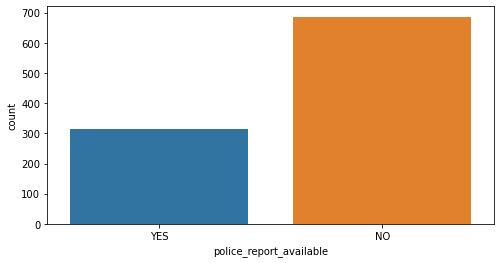

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(x='police_report_available',data=df);

The police reports available are less for fraud insurance claim.

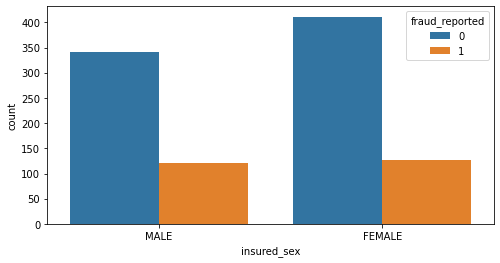

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x='insured_sex',hue="fraud_reported",data=df);

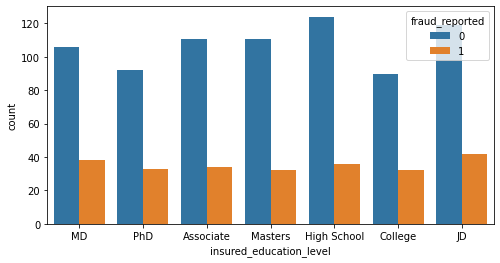

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x='insured_education_level',hue="fraud_reported",data=df);

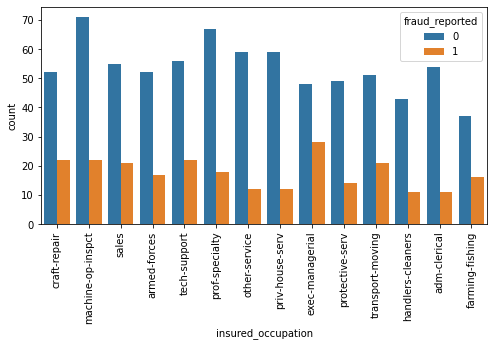

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x='insured_occupation',hue="fraud_reported",data=df);
plt.xticks(rotation=90);

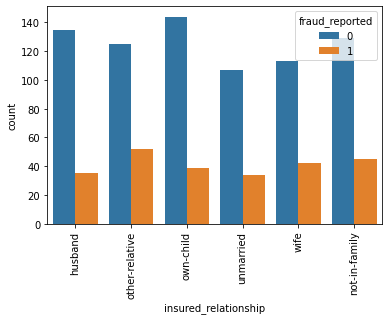

In [42]:
sns.countplot(x='insured_relationship',hue="fraud_reported",data=df);
plt.xticks(rotation=90);

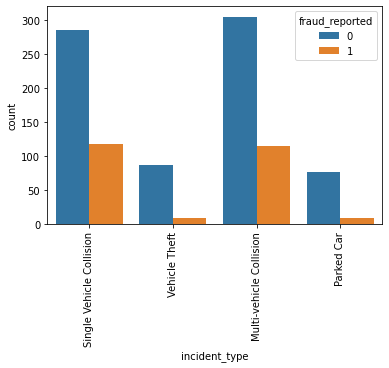

In [43]:
sns.countplot(x='incident_type',hue="fraud_reported",data=df);
plt.xticks(rotation=90);

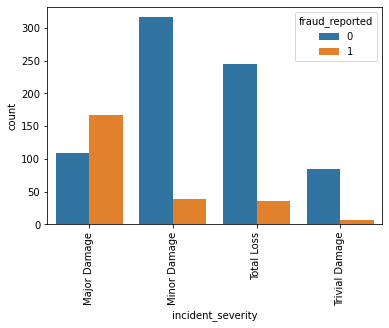

In [44]:
sns.countplot(x='incident_severity',hue="fraud_reported",data=df);
plt.xticks(rotation=90);

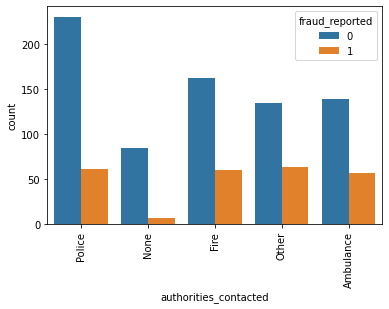

In [45]:
sns.countplot(x='authorities_contacted',hue="fraud_reported",data=df);
plt.xticks(rotation=90);

# Box Plots showing outliers

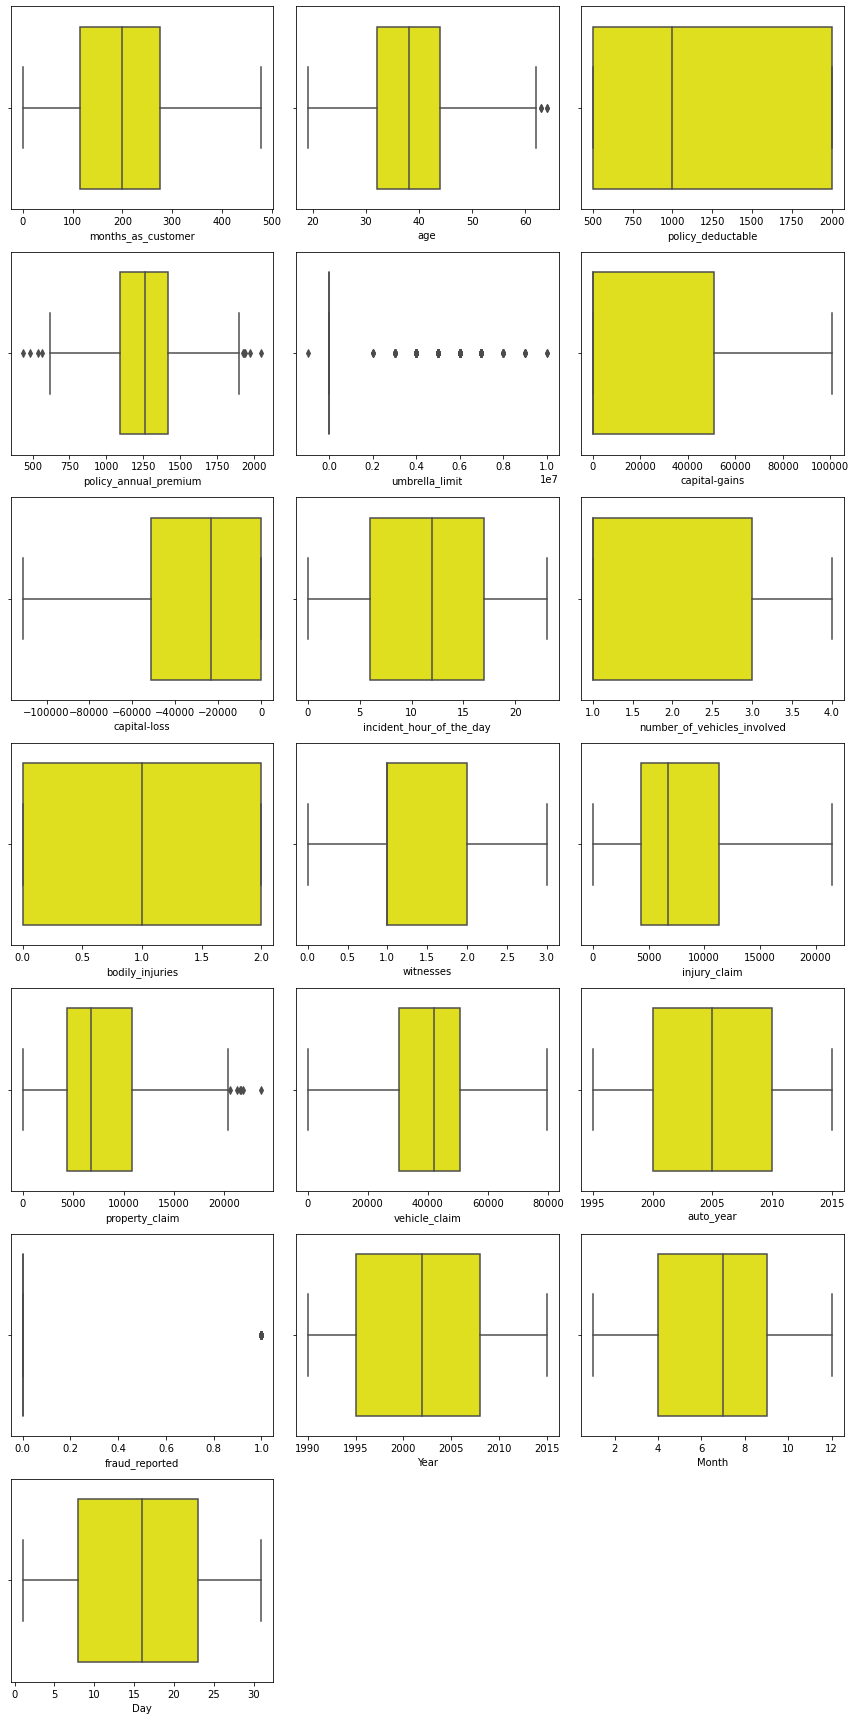

In [46]:
numerical_features=df.select_dtypes(include=[np.number]).columns
collist=numerical_features.values
ncol=3
nrows=7
plt.figure(figsize=(12,8*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='yellow',orient='v')
    plt.tight_layout()

# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i])

In [48]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Year,Month,Day
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,5,1,1,1,2,1,6510,13020,52080,10,1,2004,1,2014,10,17
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,41,3,1,1,4,5,5,8,1,0,0,0,0,780,780,3510,8,12,2007,1,2006,6,27
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,7,3,0,2,3,0,7700,3850,23100,4,30,2007,0,2000,6,9
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,5,1,0,1,2,0,6340,6340,50720,3,34,2014,1,1990,5,25
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,34,3,1,1,2,1,0,20,1,0,0,1,0,1300,650,4550,0,31,2009,0,2014,6,6


# Separating x(Independent) and y(target) variable.

In [49]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [50]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Year,Month,Day
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,5,1,1,1,2,1,6510,13020,52080,10,1,2004,2014,10,17
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,41,3,1,1,4,5,5,8,1,0,0,0,0,780,780,3510,8,12,2007,2006,6,27
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,7,3,0,2,3,0,7700,3850,23100,4,30,2007,2000,6,9
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,5,1,0,1,2,0,6340,6340,50720,3,34,2014,1990,5,25
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,34,3,1,1,2,1,0,20,1,0,0,1,0,1300,650,4550,0,31,2009,2014,6,6


In [51]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

# Removing Class Imbalance

In [52]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

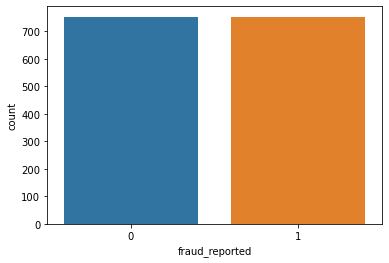

In [53]:
sns.countplot(y_over)

# Checking Skewness

In [54]:
x_over.skew()

months_as_customer             0.349714
age                            0.461505
policy_state                   0.188708
policy_csl                     0.335365
policy_deductable              0.456305
policy_annual_premium          0.043617
umbrella_limit                 1.819961
insured_sex                    0.455341
insured_education_level        0.085132
insured_occupation            -0.020511
insured_hobbies               -0.006344
insured_relationship           0.185483
capital-gains                  0.490641
capital-loss                  -0.361862
incident_date                  0.080497
incident_type                  0.285590
collision_type                 0.131296
incident_severity              0.706317
authorities_contacted         -0.007783
incident_state                -0.039205
incident_city                  0.142783
incident_hour_of_the_day      -0.043989
number_of_vehicles_involved    0.609923
property_damage                1.281688
bodily_injuries                0.198392


# Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)
x_over.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Year,Month,Day
0,0.684760,0.644444,1.0,0.5,0.333333,0.603112,0.090909,1.0,0.666667,0.153846,0.894737,0.0,0.530348,1.000000,0.830508,0.666667,1.0,0.000000,1.0,0.666667,0.166667,0.217391,0.000000,1.0,0.5,0.666667,1.0,0.303497,0.550063,0.654296,0.769231,0.026316,0.45,0.96,0.818182,0.533333
1,0.475992,0.511111,0.5,0.5,1.000000,0.473214,0.545455,1.0,0.666667,0.461538,0.789474,0.4,0.000000,1.000000,0.694915,1.000000,0.5,0.333333,1.0,0.833333,0.833333,0.347826,0.000000,0.0,0.0,0.000000,0.0,0.036364,0.032953,0.043276,0.615385,0.315789,0.60,0.64,0.454545,0.866667
2,0.279749,0.222222,1.0,0.0,1.000000,0.606972,0.545455,0.0,1.000000,0.846154,0.105263,0.6,0.349254,1.000000,0.745763,0.000000,0.5,0.333333,1.0,0.166667,0.166667,0.304348,0.666667,0.0,1.0,1.000000,0.0,0.358974,0.162653,0.289722,0.307692,0.789474,0.60,0.40,0.454545,0.266667
3,0.534447,0.488889,0.0,0.5,1.000000,0.608582,0.636364,0.0,1.000000,0.076923,0.105263,0.8,0.486567,0.438344,0.322034,0.666667,0.0,0.000000,1.0,0.333333,0.000000,0.217391,0.000000,0.0,0.5,0.666667,0.0,0.295571,0.267850,0.637187,0.230769,0.894737,0.95,0.00,0.363636,0.800000
4,0.475992,0.555556,0.0,1.0,0.333333,0.712760,0.636364,1.0,0.000000,0.846154,0.105263,0.8,0.656716,0.585959,0.576271,1.000000,0.5,0.333333,0.5,0.166667,0.000000,0.869565,0.000000,0.0,0.0,0.333333,0.0,0.060606,0.027461,0.056359,0.000000,0.815789,0.70,0.96,0.454545,0.166667


# Finding the best random state

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8473451327433629 on Random State:  68


# Train Test Split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=68)

# Model Selection

In [58]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8473451327433629
[[185  40]
 [ 29 198]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       225
           1       0.83      0.87      0.85       227

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452



In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score:
0.7212389380530974
[[109 116]
 [ 10 217]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       225
           1       0.65      0.96      0.77       227

    accuracy                           0.72       452
   macro avg       0.78      0.72      0.70       452
weighted avg       0.78      0.72      0.70       452



In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.7986725663716814
[[175  50]
 [ 41 186]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       225
           1       0.79      0.82      0.80       227

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452



# Ensemble technique

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8960176991150443
[[204  21]
 [ 26 201]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       225
           1       0.91      0.89      0.90       227

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



In [62]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8473451327433629
[[195  30]
 [ 39 188]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       225
           1       0.86      0.83      0.84       227

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452



# Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.75  0.75  0.73  0.755 0.755]
0.748


In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.745 0.685 0.67  0.675 0.695]
0.6940000000000001


In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.735 0.82  0.765 0.765 0.78 ]
0.773


In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
scorerf=score.mean()

[0.785 0.735 0.73  0.795 0.77 ]
0.763


In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.755 0.755 0.73  0.83  0.83 ]
0.78


### As the least difference between accuracy and cross validation score is for DecisionTreeClassifier it is our best model.

# Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
parameter={'splitter':['best', 'random'],'max_depth':list(np.arange(1,10)),
            'min_samples_split':list(np.arange(1,11)),'min_samples_leaf':list(np.arange(1,10))}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
Final_mod=DecisionTreeClassifier(max_depth=4,min_samples_leaf=7,min_samples_split=2,splitter='best')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.50442477876106


# AUC-ROC CURVE

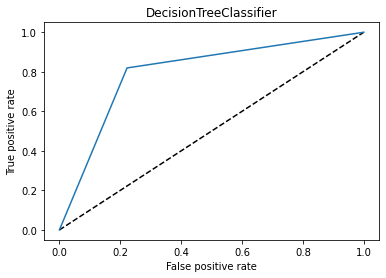

0.7985805188448362

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

# Saving the model

In [71]:
import joblib
joblib.dump(dtc,'dtcfile.obj')

['dtcfile.obj']

# Prediction

In [72]:
dtc_from_joblib=joblib.load('dtcfile.obj')

In [73]:
dtc_from_joblib.predict(x_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,